In [32]:
library(data.table)
library(tidyverse)
library(foreach)
library(zoo)

setwd('~/snap_hap/recRate/Chr6.MF3.pFR.hCov/')


Attaching package: ‘zoo’


The following objects are masked from ‘package:data.table’:

    yearmon, yearqtr


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [8]:
fileList = list.files(path='./windows/', pattern='*.res.txt')

In [14]:
Sys.glob('./windows/*res.txt')

[1] "./windows/w1000.49945001.50005000.res.txt"
  [2] "./windows/w1001.49995001.50055000.res.txt"
  [3] "./windows/w1002.50045001.50105000.res.txt"
  [4] "./windows/w100.4945001.5005000.res.txt"   
  [5] "./windows/w1005.50195001.50255000.res.txt"
  [6] "./windows/w1006.50245001.50305000.res.txt"
  [7] "./windows/w1007.50295001.50355000.res.txt"
  [8] "./windows/w1008.50345001.50405000.res.txt"
  [9] "./windows/w1010.50445001.50505000.res.txt"
 [10] "./windows/w1011.50495001.50555000.res.txt"
 [11] "./windows/w101.4995001.5055000.res.txt"   
 [12] "./windows/w1015.50695001.50755000.res.txt"
 [13] "./windows/w1016.50745001.50805000.res.txt"
 [14] "./windows/w1017.50795001.50855000.res.txt"
 [15] "./windows/w1019.50895001.50955000.res.txt"
 [16] "./windows/w1020.50945001.51005000.res.txt"
 [17] "./windows/w102.5045001.5105000.res.txt"   
 [18] "./windows/w1025.51195001.51255000.res.txt"
 [19] "./windows/w1031.51495001.51555000.res.txt"
 [20] "./windows/w1034.51645001.51705000.res.txt"
 [21] "./windows/w103.5095001.5155000.res.txt"   
 [22] "./windows/w1035.51695001.51755000.res.txt"
 [23] "./windows/w1036.51745001.51805000.res.txt"
 [24] "./windows/w1037.51795001.51855000.res.txt"
 [25] "./windows/w1039.51895001.51955000.res.txt"
 [26] "./windows/w1041.51995001.52055000.res.txt"
 [27] "./windows/w1043.52095001.52155000.res.txt"
 [28] "./windows/w10.445001.505000.res.txt"      
 [29] "./windows/w104.5145001.5205000.res.txt"   
 [30] "./windows/w1046.52245001.52305000.res.txt"
 [31] "./windows/w1047.52295001.52355000.res.txt"
 [32] "./windows/w1049.52395001.52455000.res.txt"
 [33] "./windows/w1050.52445001.52505000.res.txt"
 [34] "./windows/w1051.52495001.52555000.res.txt"
 [35] "./windows/w1052.52545001.52605000.res.txt"
 [36] "./windows/w1053.52595001.52655000.res.txt"
 [37] "./windows/w105.5195001.5255000.res.txt"   
 [38] "./windows/w1056.52745001.52805000.res.txt"
 [39] "./windows/w1057.52795001.52855000.res.txt"
 [40] "./windows/w106.5245001.5305000.res.txt"   
 [41] "./windows/w1065.53195001.53255000.res.txt"
 [42] "./windows/w1066.53245001.53305000.res.txt"
 [43] "./windows/w1067.53295001.53355000.res.txt"
 [44] "./windows/w1068.53345001.53405000.res.txt"
 [45] "./windows/w1069.53395001.53455000.res.txt"
 [46] "./windows/w1071.53495001.53555000.res.txt"
 [47] "./windows/w1072.53545001.53605000.res.txt"
 [48] "./windows/w1073.53595001.53655000.res.txt"
 [49] "./windows/w107.5295001.5355000.res.txt"   
 [50] "./windows/w1075.53695001.53755000.res.txt"
 [51] "./windows/w1079.53895001.53955000.res.txt"
 [52] "./windows/w1083.54095001.54155000.res.txt"
 [53] "./windows/w1084.54145001.54205000.res.txt"
 [54] "./windows/w108.5345001.5405000.res.txt"   
 [55] "./windows/w1086.54245001.54305000.res.txt"
 [56] "./windows/w1088.54345001.54405000.res.txt"
 [57] "./windows/w1091.54495001.54555000.res.txt"
 [58] "./windows/w1092.54545001.54605000.res.txt"
 [59] "./windows/w109.5395001.5455000.res.txt"   
 [60] "./windows/w1096.54745001.54805000.res.txt"
 [61] "./windows/w1098.54845001.54905000.res.txt"
 [62] "./windows/w1099.54895001.54955000.res.txt"
 [63] "./windows/w1102.55045001.55105000.res.txt"
 [64] "./windows/w1103.55095001.55155000.res.txt"
 [65] "./windows/w1104.55145001.55205000.res.txt"
 [66] "./windows/w110.5445001.5505000.res.txt"   
 [67] "./windows/w1108.55345001.55405000.res.txt"
 [68] "./windows/w1109.55395001.55455000.res.txt"
 [69] "./windows/w1110.55445001.55505000.res.txt"
 [70] "./windows/w111.5495001.5555000.res.txt"   
 [71] "./windows/w112.5545001.5605000.res.txt"   
 [72] "./windows/w113.5595001.5655000.res.txt"   
 [73] "./windows/w114.5645001.5705000.res.txt"   
 [74] "./windows/w11.495001.555000.res.txt"      
 [75] "./windows/w1.1.55000.res.txt"             
 [76] "./windows/w115.5695001.5755000.res.txt"   
 [77] "./windows/w116.5745001.5805000.res.txt"   
 [78] "./windows/w117.5795001.5855000.res.txt"   
 [79] "./windows/w118.5845001.5905000.res.txt"   
 [80] "./windows/w119.5895001.5955000.res.txt"   
 [

In [86]:
recRate = foreach(file = Sys.glob('./windows/*res.txt'), 
        .combine=rbind) %do% {
    dat = fread(file)
    dat = dat[-1,]
    dat
    # cat(file,'\n')
}
recRate[,Loci := Loci*1000]
recRate = recRate %>% arrange(Loci, desc=T) %>% distinct(Loci, .keep_all = T)

In [87]:
str(recRate)

Classes ‘data.table’ and 'data.frame':	1620617 obs. of  5 variables:
 $ Loci    : num  11409 11418 11472 11555 11563 ...
 $ Mean_rho: num  5.98 5.97 5.98 5.99 6.08 ...
 $ Median  : num  6.54 6.55 6.55 6.55 6.55 ...
 $ L95     : num  0.417 0.304 0.591 0.479 0.605 ...
 $ U95     : num  7.91 7.76 7.76 7.76 7.76 ...
 - attr(*, ".internal.selfref")=<externalptr> 


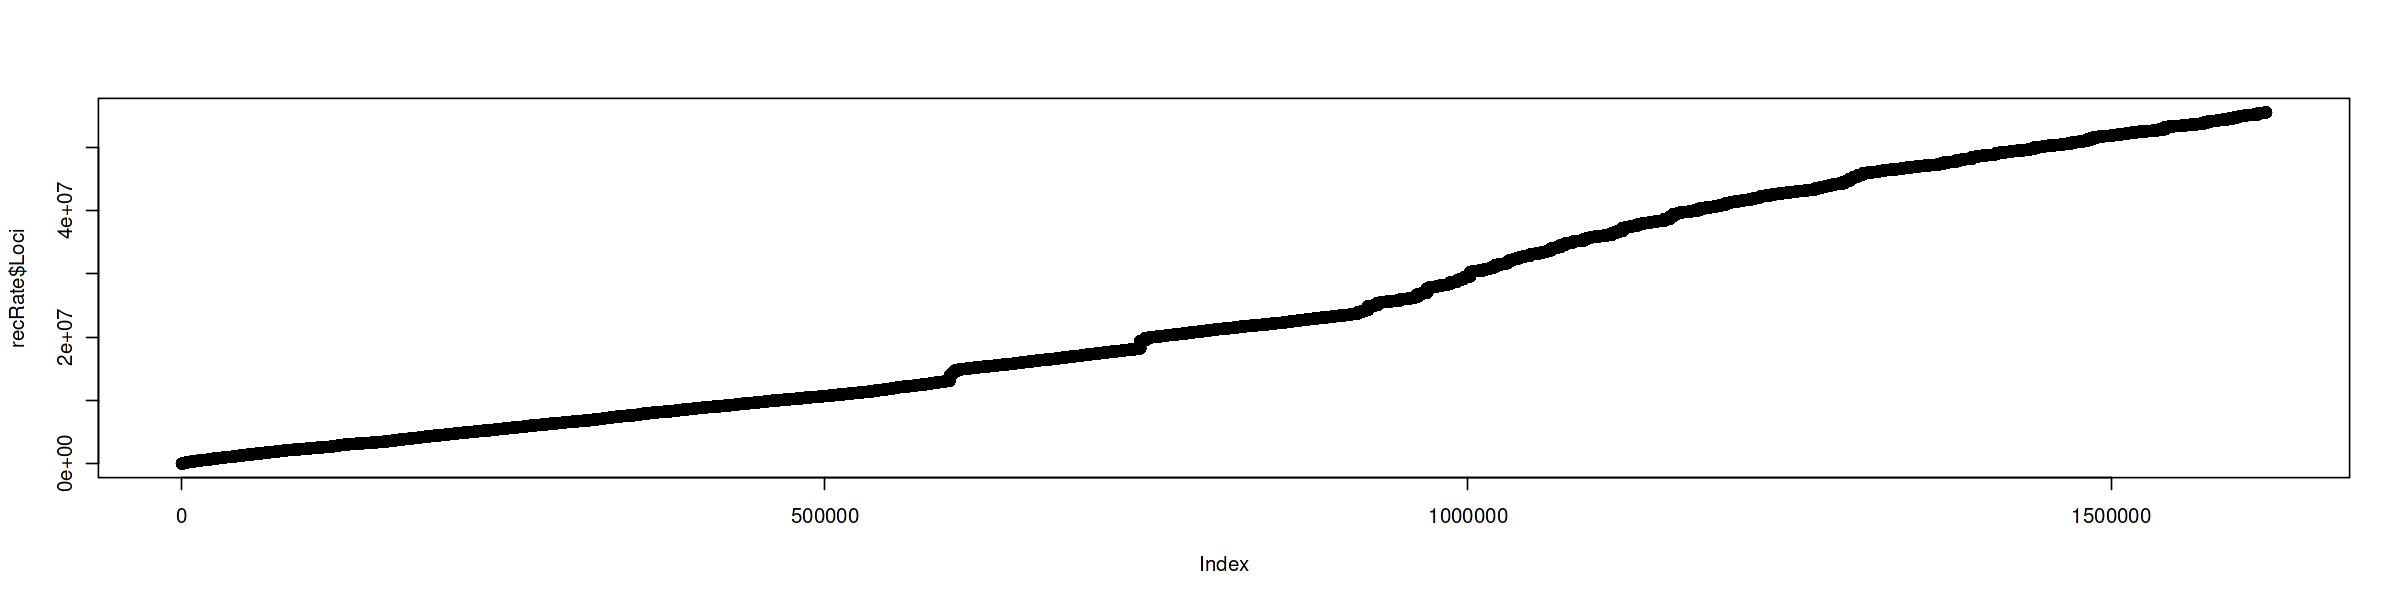

In [53]:
plot(recRate$Loci)

In [59]:
loci = rollapply(recRate, width=2000, by=100, FUN=mean)
# rec = rollapply(recRate$, width=2000, by=100, FUN=mean)
str(loci)

 num [1:16187, 1:5] 69178 74758 80340 85912 91142 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:5] "Loci" "Mean_rho" "Median" "L95" ...


In [60]:
loci

Loci,Mean_rho,Median,L95,U95
69177.59,8.129557,8.189417,1.330955,12.14107
74757.81,9.053099,9.114461,1.391412,13.38725
80339.71,9.153225,9.026100,1.314137,14.00257
85911.77,9.110259,8.988899,1.285889,13.91028
91141.78,8.953532,8.826496,1.236763,13.80657
96405.93,9.013650,8.895294,1.201386,13.98101
101768.59,9.810761,9.702307,1.196414,15.00093
107164.71,10.631535,10.567600,1.166422,16.07428
112586.26,11.253323,11.234195,1.124321,16.83505
118052.23,11.907851,11.910743,1.119335,17.70752


In [63]:
min(recRate$Loci)
max(recRate$Loci)

[1] 11409

[1] 55500662

In [75]:
window_size = 10000
step_size = window_size 
window_start = seq(1,max(recRate$Loci), step_size)
window_end = seq(window_size+1,max(recRate$Loci)+window_size, step_size)

In [76]:
print(window_start)
print(window_end)

   [1]        1    10001    20001    30001    40001    50001    60001    70001
   [9]    80001    90001   100001   110001   120001   130001   140001   150001
  [17]   160001   170001   180001   190001   200001   210001   220001   230001
  [25]   240001   250001   260001   270001   280001   290001   300001   310001
  [33]   320001   330001   340001   350001   360001   370001   380001   390001
  [41]   400001   410001   420001   430001   440001   450001   460001   470001
  [49]   480001   490001   500001   510001   520001   530001   540001   550001
  [57]   560001   570001   580001   590001   600001   610001   620001   630001
  [65]   640001   650001   660001   670001   680001   690001   700001   710001
  [73]   720001   730001   740001   750001   760001   770001   780001   790001
  [81]   800001   810001   820001   830001   840001   850001   860001   870001
  [89]   880001   890001   900001   910001   920001   930001   940001   950001
  [97]   960001   970001   980001   990001  1000001 

In [77]:
recRate_windows = data.table()
for (winID in 1:length(window_start)){
    tmp = recRate[Loci>=window_start[winID] & Loci<=window_end[winID]]
    values = tmp[, lapply(.SD, mean)]
    recRate_windows = rbind(recRate_windows, values)
}

In [78]:
str(recRate_windows)
# recRate[, lapply(.SD, mean)]

Classes ‘data.table’ and 'data.frame':	5551 obs. of  5 variables:
 $ Loci    : num  NaN 16714 21197 36356 42644 ...
 $ Mean_rho: num  NaN 6.3 6.76 8.24 7.5 ...
 $ Median  : num  NaN 6.71 6.81 8.27 6.85 ...
 $ L95     : num  NaN 1.396 1.649 1.675 0.919 ...
 $ U95     : num  NaN 7.93 11.3 11.35 13.75 ...
 - attr(*, ".internal.selfref")=<externalptr> 


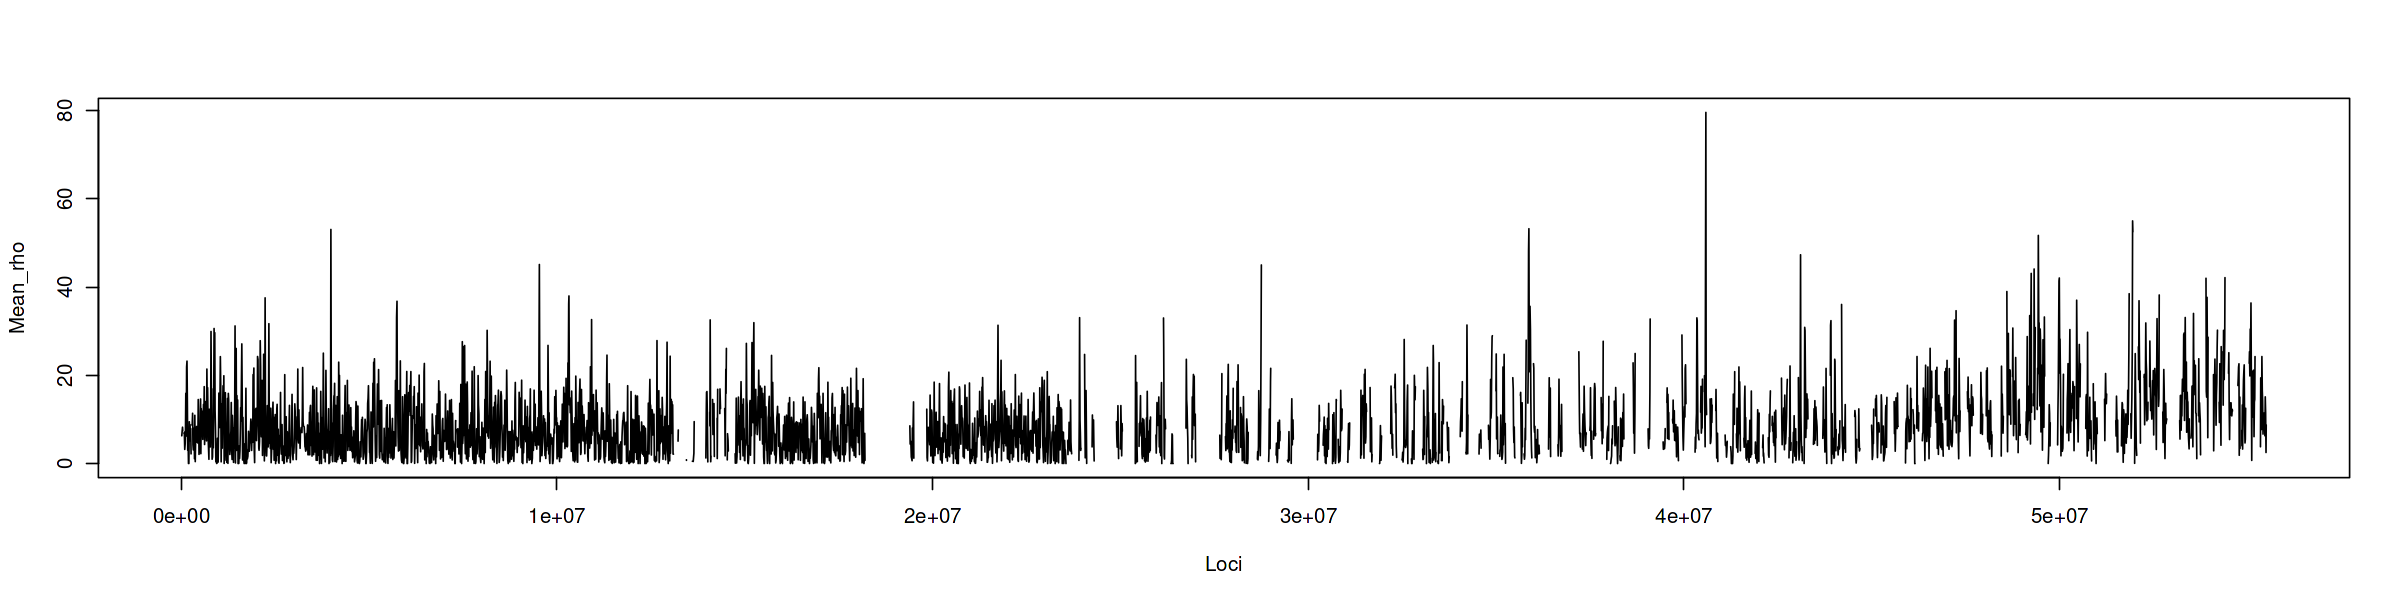

In [80]:
options(repr.plot.width=20, repr.plot.height=5)
plot(Mean_rho~Loci, recRate_windows, type='l')

In [85]:
mean(recRate$Mean_rho)
mean(recRate$Mean_rho)/(4*354349)
(mean(recRate$Mean_rho)/(4*354349))*1e6/

[1] 10.25042

[1] 7.231866e-06

[1] 7.231866

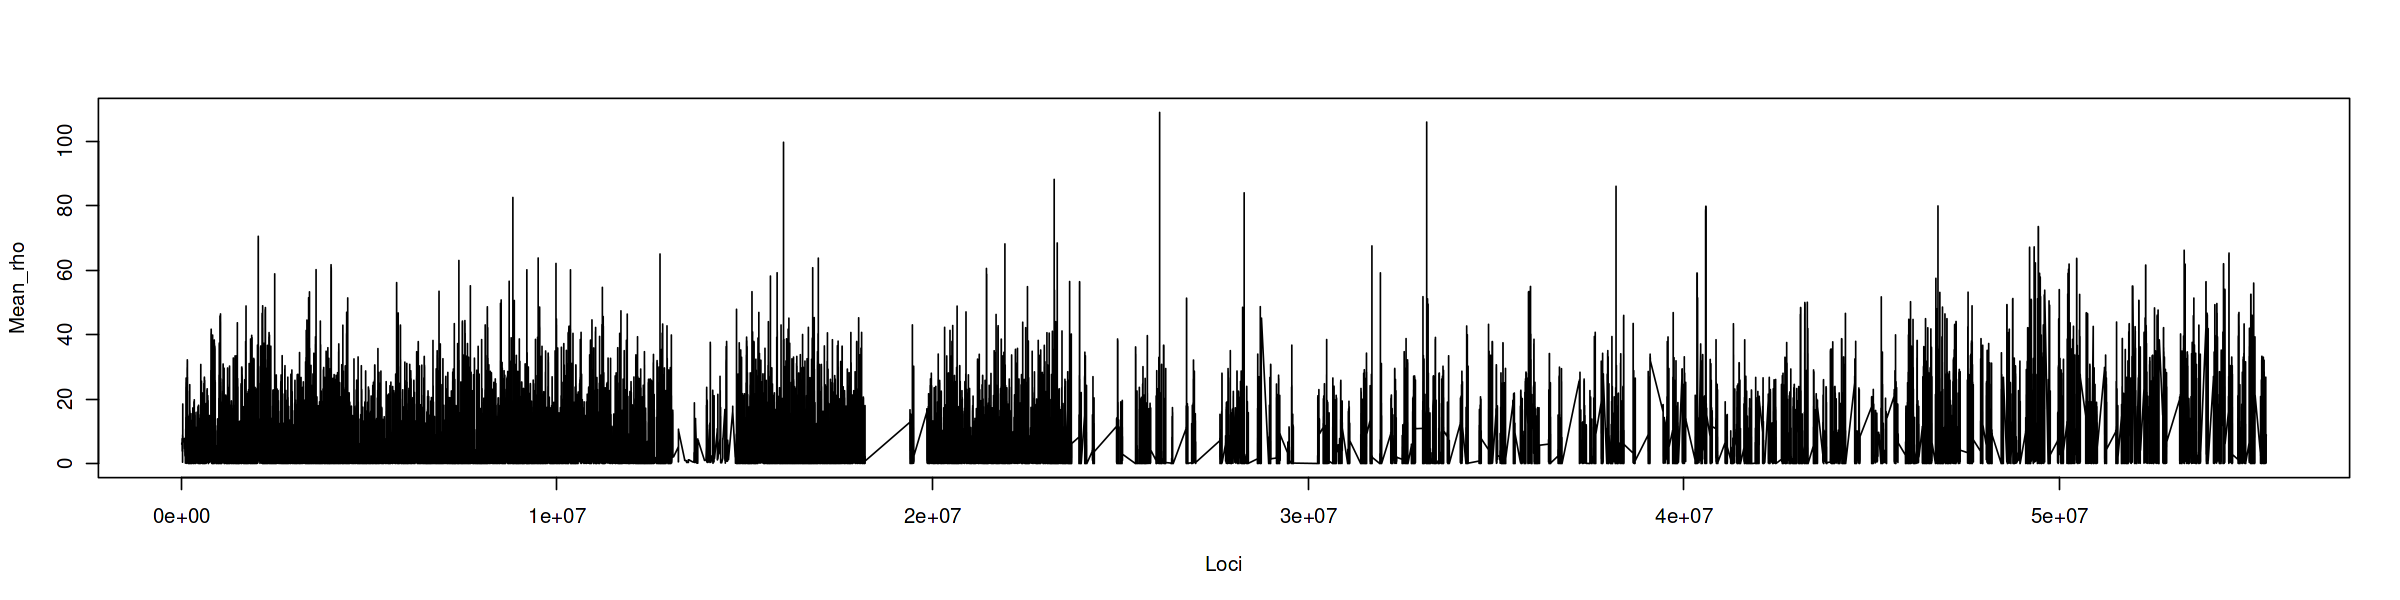

In [82]:
options(repr.plot.width=20, repr.plot.height=5)
plot(Mean_rho~Loci, recRate, type='l')

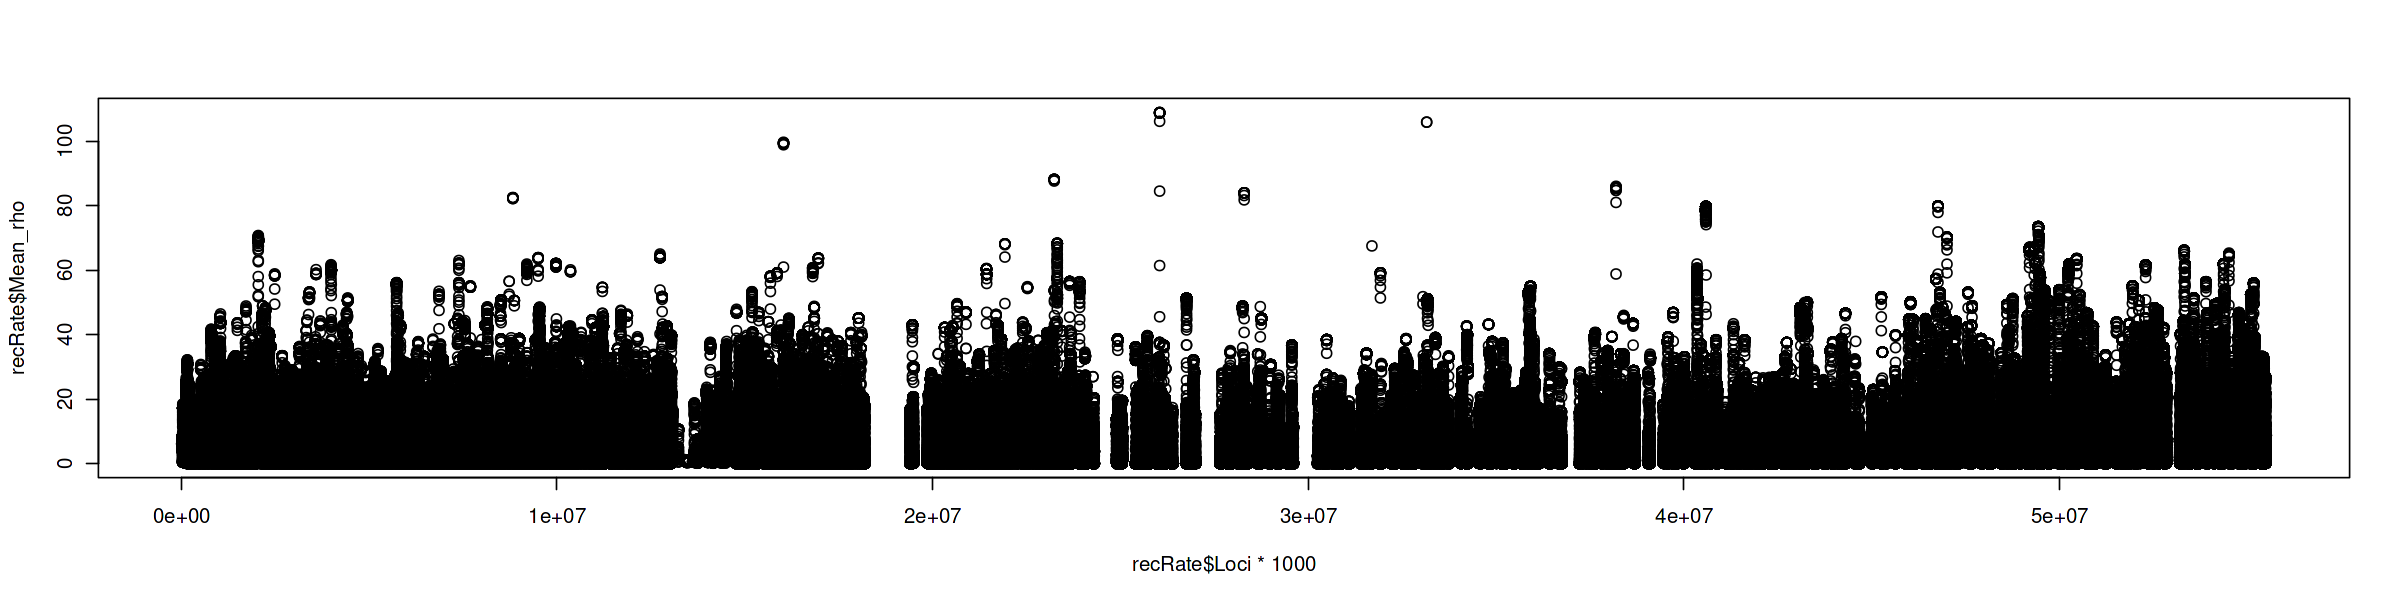

In [29]:
options(repr.plot.width=20, repr.plot.height=5)
plot($Loci*1000, recRate$Mean_rho)

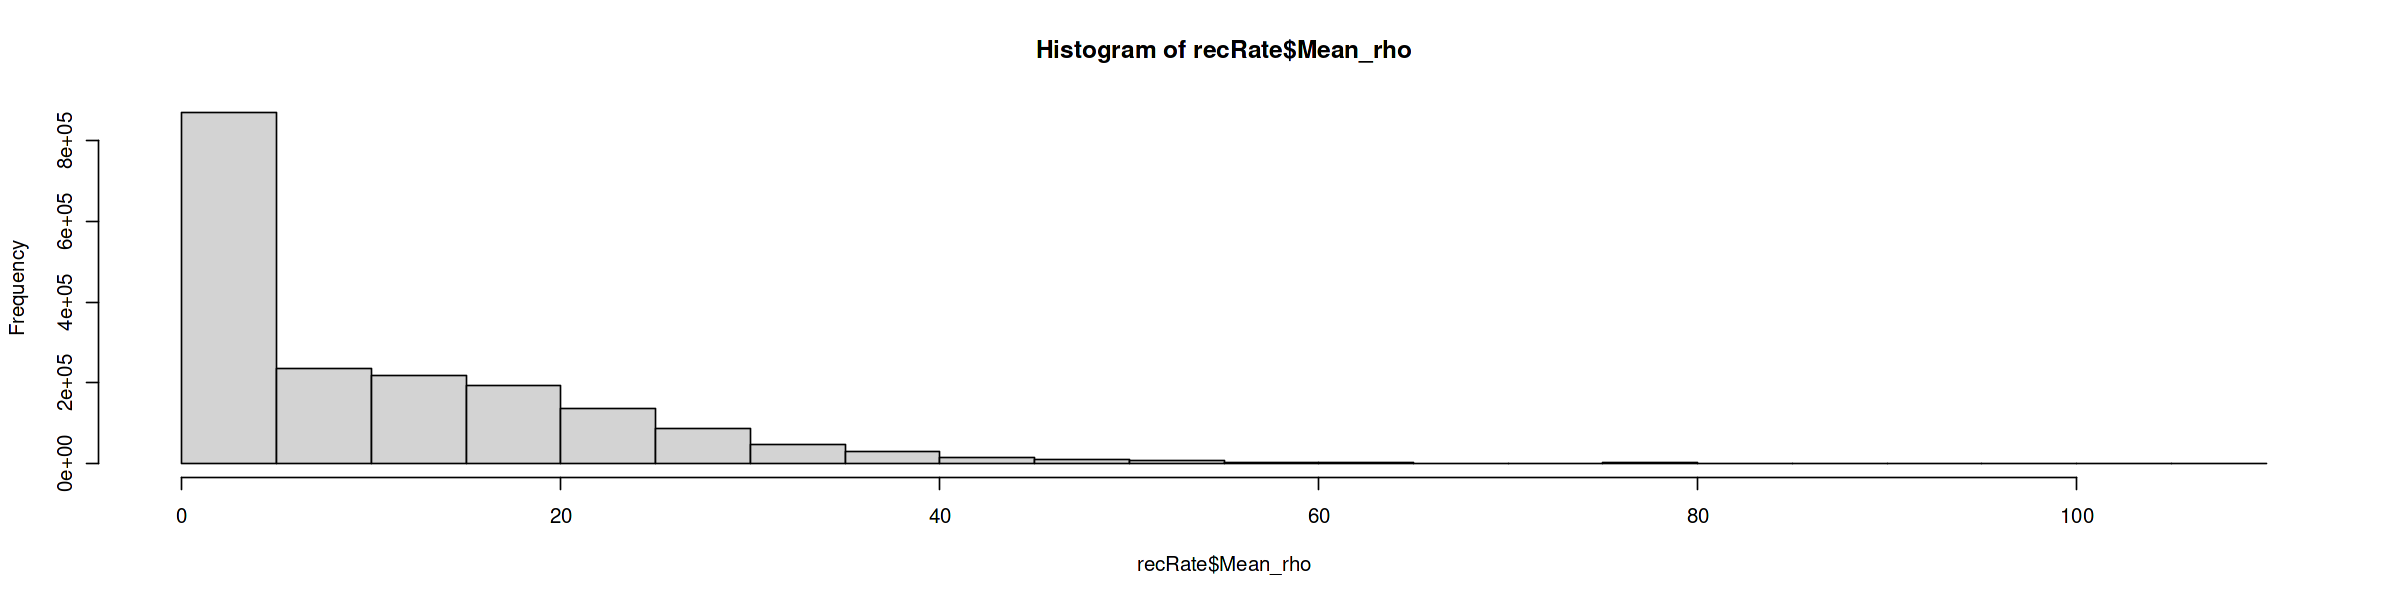

In [30]:
hist(recRate$Mean_rho)

In [35]:
a = data.frame(day=seq(1:10), obs=sample(10,replace = T))
a
# rollapply(obs, )

day,obs
<int>,<int>
1,6
2,8
3,1
4,5
5,1
6,9
7,5
8,3
9,8


In [43]:
rollapply(a, width=3, by=1, FUN=mean)

day,obs
2,5.000000
3,4.666667
4,2.333333
5,5.000000
6,5.000000
7,5.666667
8,5.333333
9,6.000000


In [ ]:
calculate_window_stats <- function(df, window_size, step_size) {
    results <- data.frame()
    window_start <- seq(1, max(pos), window_size)
    window_end <- seq(step_size, max(pos)+window_size, window_size)
    no_of_windows <- 
  
    for (start in seq(1, nrow(df) - window_size + 1, by = step_size)) {
    end <- start + window_size - 1
    window <- df[start:end, ]
    
    stats <- data.frame(
      start = start,
      end = end,
      mean_A = mean(window$A),
      median_A = median(window$A),
      min_A = min(window$A),
      max_A = max(window$A),
      mean_B = mean(window$B),
      median_B = median(window$B),
      min_B = min(window$B),
      max_B = max(window$B)
    )
    
    results <- rbind(results, stats)
  }
  
  return(results)
}

In [12]:
0.015/(4*1e-8)

375000.0

In [ ]:
recRate = pd.read_csv

In [4]:
rec6 = pd.read_csv('/Users/apal/Phd/Projects/2021-snap_hap/recRate/Chr6.MF1/MF1.Chr6.intervalres.txt', sep='\t')
rec6 = rec6[1:]
rec6.head()

,Loci,Mean_rho,Median,L95,U95
1,11.409,0.00179,0.00179,0.00179,0.00179
2,11.418,0.00179,0.00179,0.00179,0.00179
3,11.472,0.00179,0.00179,0.00179,0.00179
4,11.555,0.00179,0.00179,0.00179,0.00179
5,11.563,0.00179,0.00179,0.00179,0.00179


In [5]:
rec6['Loci'] = rec6['Loci']*1000

In [6]:
rec6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533822 entries, 1 to 2533822
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Loci      float64
 1   Mean_rho  float64
 2   Median    float64
 3   L95       float64
 4   U95       float64
dtypes: float64(5)
memory usage: 96.7 MB


In [7]:
rec6.head()

,Loci,Mean_rho,Median,L95,U95
1,11409.0,0.00179,0.00179,0.00179,0.00179
2,11418.0,0.00179,0.00179,0.00179,0.00179
3,11472.0,0.00179,0.00179,0.00179,0.00179
4,11555.0,0.00179,0.00179,0.00179,0.00179
5,11563.0,0.00179,0.00179,0.00179,0.00179


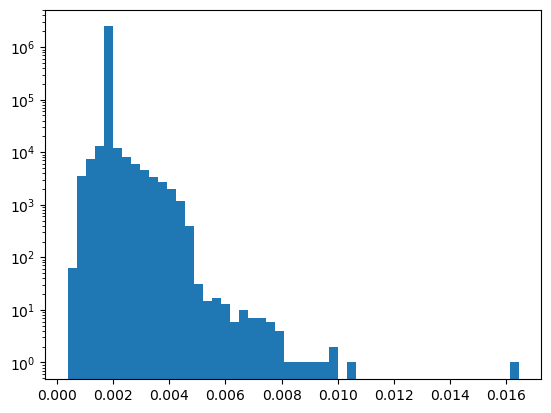

In [10]:
plt.hist(rec6['Mean_rho'], bins=50)
plt.yscale('log')
plt.show()

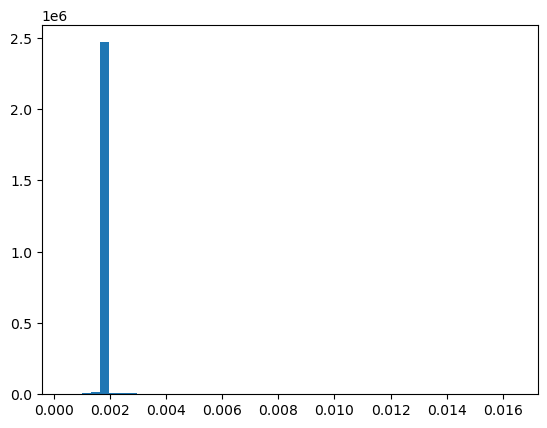

In [11]:
plt.hist(rec6['Mean_rho'], bins=50)
plt.show()

In [38]:
window_size = 10000
step_size = 10000
max_pos = float(np.max(rec6['Loci']))
bins = range(0, int(max_pos) + window_size, window_size)
labels = [f'{i+1}-{i+window_size}' for i in bins[:-1]]

In [41]:
rec6['bin'] = pd.cut(rec6['Loci'], bins=bins, labels=labels, right=True)

In [47]:
rec6_windowed = rec6.groupby(['bin']).mean().reset_index()

/var/folders/gk/63dm4mgd2cq_k27sk1qlnwbc0000gq/T/ipykernel_90594/222846619.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rec6_windowed = rec6.groupby(['bin']).mean().reset_index()


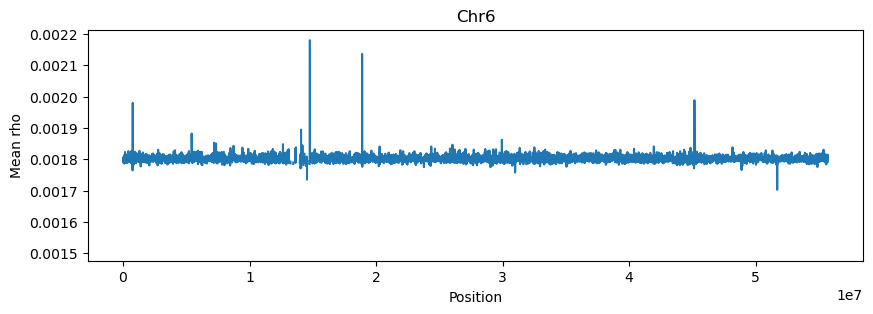

In [60]:
plt.figure(figsize=(10, 3))
plt.plot(rec6_windowed['Loci'],rec6_windowed['Mean_rho'])
plt.xlabel('Position')
plt.ylabel('Mean rho')
plt.title('Chr6')
plt.show()


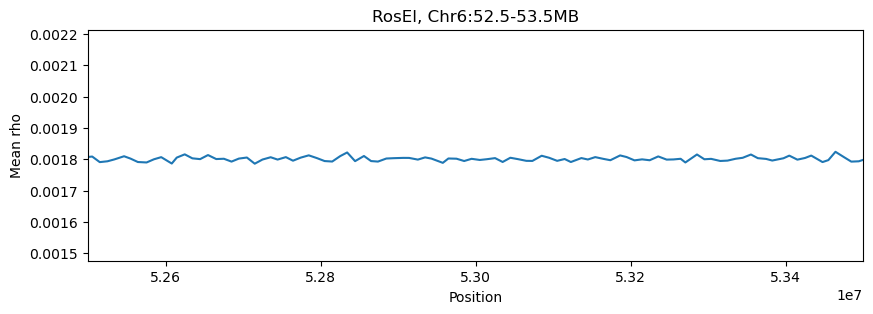

In [61]:
plt.figure(figsize=(10, 3))
plt.plot(rec6_windowed['Loci'],rec6_windowed['Mean_rho'])
plt.xlabel('Position')
plt.ylabel('Mean rho')
plt.title('RosEl, Chr6:52.5-53.5MB')
plt.xlim(52.5e6,53.5e6)
plt.show()


In [13]:
window_size = 100
step_size = 100
max_pos = float(np.max(rec6['Loci']))
bins = range(0, int(max_pos) + window_size, window_size)
labels = [f'{i+1}-{i+window_size}' for i in bins[:-1]]
rec6['bin2'] = pd.cut(rec6['Loci'], bins=bins, labels=labels, right=True)

In [14]:
rec6_w100b = rec6.groupby(['bin2']).mean().reset_index()

/var/folders/gk/63dm4mgd2cq_k27sk1qlnwbc0000gq/T/ipykernel_17165/271958468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rec6_w100b = rec6.groupby(['bin2']).mean().reset_index()


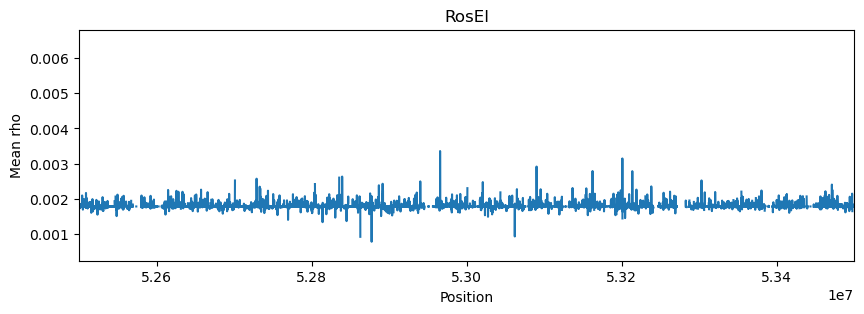

In [18]:
plt.figure(figsize=(10, 3))
plt.plot(rec6_w100b['Loci'],rec6_w100b['Mean_rho'])
plt.xlabel('Position')
plt.ylabel('Mean rho')
plt.title('RosEl')
plt.xlim(52.5e6,53.5e6)

plt.show()


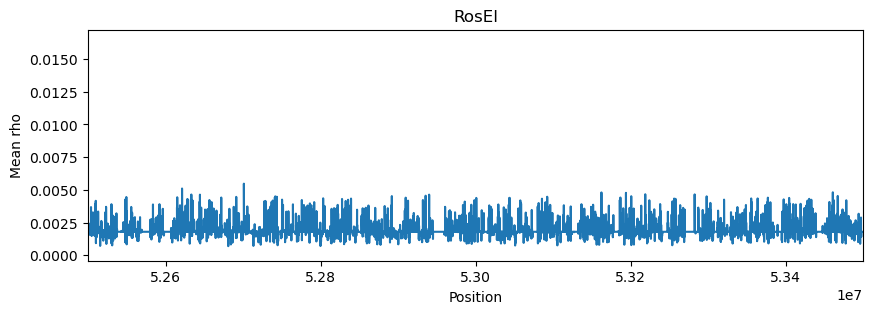

In [19]:
plt.figure(figsize=(10, 3))
plt.plot(rec6['Loci'],rec6['Mean_rho'])
plt.xlabel('Position')
plt.ylabel('Mean rho')
plt.title('RosEl')
plt.xlim(52.5e6,53.5e6)

plt.show()

In [20]:
0.018/(4*354349)

1.2699344431619673e-08

In [ ]:
window_size = 100
step_size = 100
max_pos = float(np.max(rec6['Loci']))
bins = range(0, int(max_pos) + window_size, window_size)
labels = [f'{i+1}-{i+window_size}' for i in bins[:-1]]
rec6['bin2'] = pd.cut(rec6['Loci'], bins=bins, labels=labels, right=True)
rec6_w100b = rec6.groupby(['bin2']).mean().reset_index()